In [ ]:
%matplotlib inline


=================================================
Detección de anomalías con Local Outlier Factor (LOF)
=================================================

En este ejemplo se presenta el algoritmo Local Outlier Factor (LOF). Se trata de un algoritmo de aprendizaje
no supervisado para detección de anomalías que calcula la desviación de la densidad local de puntos entre
el punto evaluado y sus vecinos. Un punto se considera una anomalía si la densidad local de puntos en torno a él
es significativamente menos que la densidad local en torno a los puntos vecinos.

El número de vecinos que se considera es el parámetro `n_neighbors` ha de ser 

* mayor que el número mínimo de puntos que se supone que un cluster debe tener
* menor que el número máximo de puntos cercanos que son potencialmente outliers.

En la práctica, esta información no es accesible, y un valor de n_neighbors=20 suele funcionar bien.


Primero cargamos el paquete de la librería.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor



Generamos los datos siguiendo una distribución normal, y separamos dos clusters idénticos de 100 puntos cada uno separados por una distancia. Añadimos 20 puntosnuevos (outliers) tomados de una distribución diferente: una uniforme en el cuadrado de lado 8.

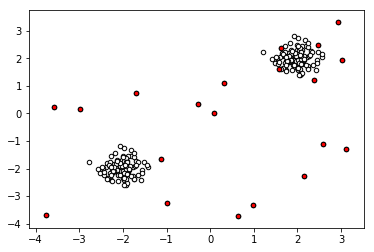

In [2]:
np.random.seed(42)
# Generate train data
X = 0.3 * np.random.randn(100, 2)
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X + 2, X - 2, X_outliers]
plt.scatter(X[:,0],X[:,1],c='white', edgecolor='k', s=20)
plt.scatter(X_outliers[:,0],X_outliers[:,1],c='red', edgecolor='k', s=20)
plt.show()

Ahora entrenamos el método sobre el conjunto de puntos incluyendo a los outliers y predecimos cuales de los puntos son outliers

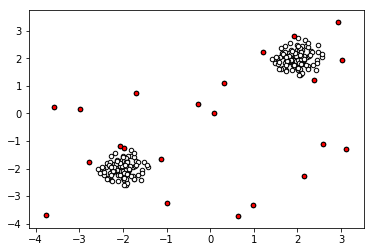

In [3]:
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(X)
X_out=X[y_pred==-1]
plt.scatter(X[:,0],X[:,1],c='white', edgecolor='k', s=20)
plt.scatter(X_out[:,0],X_out[:,1],c='red', edgecolor='k', s=20)
plt.show()

Vemos que en general acierta bastante pero en la frontera de los clusters puede fallar alguno.

### Curvas de nivel de la función de decisión

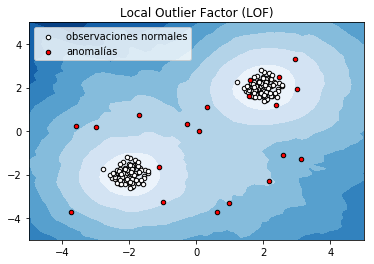

In [4]:
# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X[:200, 0], X[:200, 1], c='white',
                edgecolor='k', s=20)
b = plt.scatter(X[200:, 0], X[200:, 1], c='red',
                edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],
           ["observaciones normales",
            "anomalías"],
           loc="upper left")
plt.show()